In [1]:
#Notes:
#Fortunately, the findHomography method utilizes a robust estimation technique 
#called Random Sample Consensus (RANSAC), 
#which produces the right result even in the presence of large number of bad matches

In [1]:
# import the necessary packages
import cv2
import numpy as np
from pyzbar.pyzbar import decode
from matplotlib import pyplot as plt
import random

In [2]:
xm = 0
ym = 0

#img = cv2.imread("C:/Users/JAZ/github/Starfitter21/Test_Images/QRCode1DISTORTED.png")
img = cv2.imread("C:/Users/JAZ/github/Starfitter21/Test_Images/20210127_133346.jpg")

code = decode(img)
whichQR = "unidentified"

In [3]:
# Merge again the three channels but in the RGB format:
img_matplotlib = cv2.merge([r, g, b])


# Load image using cv2.imread:
img_OpenCV = cv2.imread('logo.png')

# Split the loaded image into its three channels (b, g, r):
b, g, r = cv2.split(img_OpenCV)

# Merge again the three channels but in the RGB format:
img_matplotlib = cv2.merge([r, g, b])

# Show both images (img_OpenCV and img_matplotlib) using matplotlib
# This will show the image in wrong color:
plt.subplot(121)
plt.imshow(img_OpenCV)
plt.title('img OpenCV')
# This will show the image in true color:
plt.subplot(122)
plt.imshow(img_matplotlib)
plt.title('img matplotlib')
plt.show()

# Show both images (img_OpenCV and img_matplotlib) using cv2.imshow()
# This will show the image in true color:
cv2.imshow('bgr image', img_OpenCV)
# This will show the image in wrong color:
cv2.imshow('rgb image', img_matplotlib)
cv2.waitKey(0)
cv2.destroyAllWindows()

# To stack horizontally (img_OpenCV to the left of img_matplotlib):
img_concats = np.concatenate((img_OpenCV, img_matplotlib), axis=1)

# Now, we show the concatenated image:
cv2.imshow('bgr image and rgb image', img_concats)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Using numpy capabilities to get the channels and two build the RGB image
# Get the three channels (instead of using cv2.split):
B = img_OpenCV[:, :, 0]
G = img_OpenCV[:, :, 1]
R = img_OpenCV[:, :, 2]

# Transform the image BGR to RGB using Numpy capabilities:
img_RGB = img_OpenCV[:, :, ::-1]

# Now, we show the RGB image:
cv2.imshow('img RGB (wrong color)', img_RGB)

# Use the function cv2.imread() to read an image.
# The image should be in the working directory or a full path of image should be provided.
# In this case, the second argument is needed, because we want to load the image in grayscale.
# Second argument is a flag which specifies the way image should be read.
# Value needed for loading a image in grayscale: 'cv2.IMREAD_GRAYSCALE'.
# load OpenCV logo image:
gray_img = cv2.imread('C:/Users/JAZ/github/Starfitter21/Test_Images/20210127_133346.jpg', cv2.IMREAD_GRAYSCALE)

In [4]:
#Pixel information of src image

# To get the dimensions of the image use img.shape
# img.shape returns a tuple of number of rows, columns and channels (if image is color)
# If image is grayscale, img.shape returns a tuple of number of rows and columns.
# So it can be used to check if loaded image is grayscale or color image.
# Get the shape of the image:
dimensions = img.shape

# Print the dimensions:
print(dimensions)
# This will print '(99, 82, 3)'

# To get the dimensions of the image use img.shape
# img.shape returns a tuple of number of rows, columns and channels (if image is color)
# If image is grayscale, img.shape returns a tuple of number of rows and columns.
# So it can be used to check if loaded image is grayscale or color image.
# Get the shape of the image:
dimensions = img.shape

# Print the dimensions:
print(dimensions)
# This will print '(99, 82, 3)'

# img.shape will return the dimensions of the image in a tuple like this: (99, 82, 3)
# Therefore, we can also get the dimensions in three independent variables.
# Get height, width and the number of channels of the input image
(h, w, c) = img.shape

# Now, we can print these three variables
# Print (h, w, c) values:
print("Dimensions of the image - Height: {}, Width: {}, Channels: {}".format(h, w, c))
# This will print 'Dimensions of the image - Height: 99, Width: 82, Channels: 3'

# Total number of elements is obtained by img.size:
total_number_of_pixels = img.size

# Print the total number of elements:
print("Total number of elements: {}".format(total_number_of_pixels))
# This will print 'Total number of pixels: 24354'

# The total number of pixels is equal to the multiplication of 'height', 'width' and 'channels':
print("Total number of elements: {}".format(h * w * c))
# This will print 'Total number of pixels: 24354'

# Image datatype is obtained by img.dtype.
# img.dtype is very important because a large number of errors is caused by invalid datatype.
# Get the image datatype:
image_dtype = img.dtype

# Print the image datatype:
print("Image datatype: {}".format(image_dtype))
# This should print 'Image datatype: uint8'
# (uint8) = unsigned char

(1747, 1963, 3)
(1747, 1963, 3)
Dimensions of the image - Height: 1747, Width: 1963, Channels: 3
Total number of elements: 10288083
Total number of elements: 10288083
Image datatype: uint8


In [5]:
# Use cv2.cvtColor() to convert an image from one color format to another
# In this case we use cv2.cvtColor() to convert the loaded image to grayscale (BGR to GRAY):
#img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [6]:
for barcode in decode(img):
    #Decodes barcode and converts it into a string)
    myData = barcode.data.decode('utf-8')

  
    #Puts polygon coordinates of QR code in np.array named pts. **No particular order.**
    pts = np.array([barcode.polygon],np.int32)

    #Determine which corners of the barcode are UL, LL, UR, LR.
    x = pts[0][0][0]
    y = pts[0][0][1]

    print(x)
    print(y)
       
    print(pts[0][0][0])
    print(pts[0][0][1])
    print(pts[0][1][0])
    print(pts[0][1][1])
    print(pts[0][2][0])
    print(pts[0][2][1])
    print(pts[0][3][0])
    print(pts[0][3][1]) 
    print("\n")

    #prints message of QR code and coordinate array of each.
    print(myData)   
    print(pts)
    print("\n")

        #Draws lines around polygon. True means it's a closed polygon, color, thickness.
    #"myData" in cv2.putText means that the QR message of that QR code is printed directly on the image.
    cv2.polylines(img,[pts],True,(255,0,0),3)
    pts2 = np.array([barcode.polygon],np.int32)
    cv2.putText(img, myData,(pts2[0][0][0],pts2[0][0][1]),cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0,0,255),2)
    #cv2.putText(img, myData,(pts2[0][0][0],pts2[0][0][1]),cv2.FONT_HERSHEY_SIMPLEX, 0.9,(0,0,255),3)

1529
1151
1529
1151
1535
1246
1614
1232
1609
1139


Lower-left corner of screen
[[[1529 1151]
  [1535 1246]
  [1614 1232]
  [1609 1139]]]


1480
271
1480
271
1482
370
1563
371
1561
273


Upper-right corner of screen
[[[1480  271]
  [1482  370]
  [1563  371]
  [1561  273]]]


343
265
343
265
357
390
480
384
467
261


Hi, Stan! This is the upper-left corner of the screen.
[[[343 265]
  [357 390]
  [480 384]
  [467 261]]]


439
1338
439
1338
445
1453
561
1434
554
1321


Lower-right corner of screen
[[[ 439 1338]
  [ 445 1453]
  [ 561 1434]
  [ 554 1321]]]




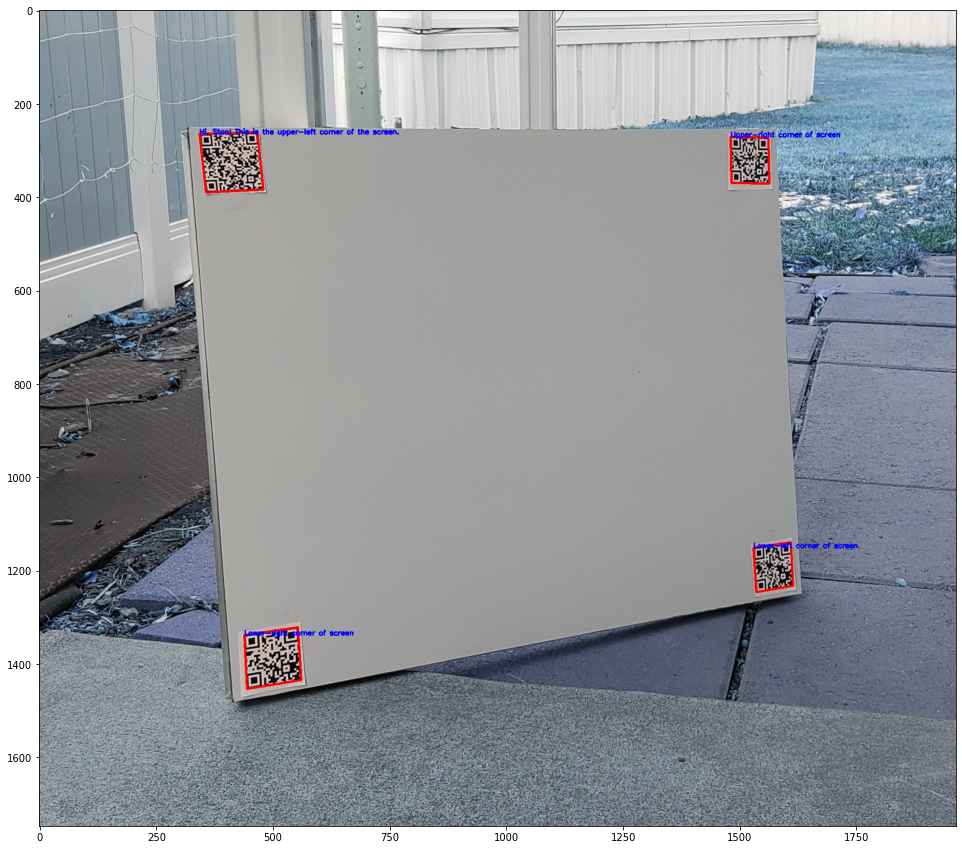

In [7]:
#Resizes image so we can see it here.
plt.rcParams["figure.figsize"] = (20,15)

#Creates plot of image.
plt.imshow(img),plt.show()

# Use the function cv2.imshow() to show an image in a window.
# The window automatically fits to the image size.
# First argument is the window name.
# Second argument is the image to be displayed.
# Each created window should have different window names.
# Show original image:
cv2.imshow("Image", img)

# cv2.waitKey() is a keyboard binding function.
# The argument is the time in milliseconds.
# The function waits for specified milliseconds for any keyboard event.
# If any key is pressed in that time, the program continues.
# If 0 is passed, it waits indefinitely for a key stroke.
# Wait indefinitely for a key stroke (in order to see the created window):
#cv2.waitKey(0)



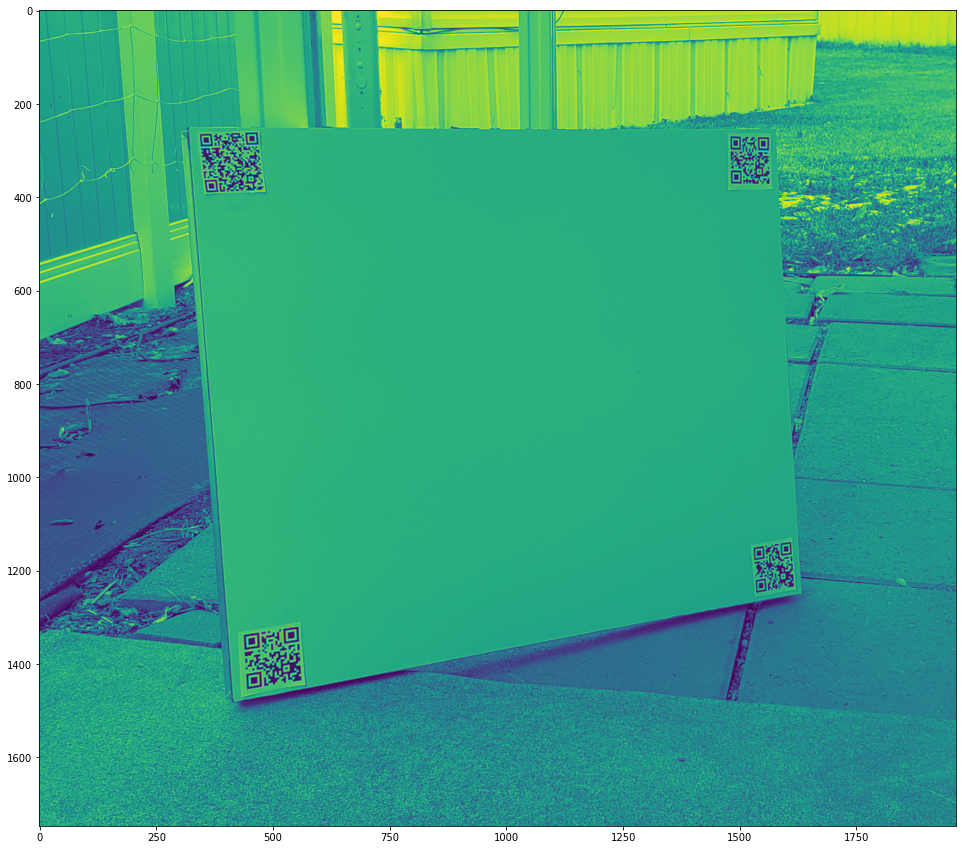

(<matplotlib.image.AxesImage at 0x17fb200c250>, None)

In [8]:
#BROKEN FIX LATER
#Show Grayscale image
cv2.imshow("Grayscale", gray_img)

#Creates plot of image.
plt.imshow(gray_img),plt.show()

In [9]:
# To destroy all the windows we created call cv2.destroyAllWindows()
cv2.destroyAllWindows()